In [1]:
!pip install konlpy
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 19.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('movie_rv.csv')

In [4]:
df = df.dropna()

In [5]:
df_sp = df[:50000]

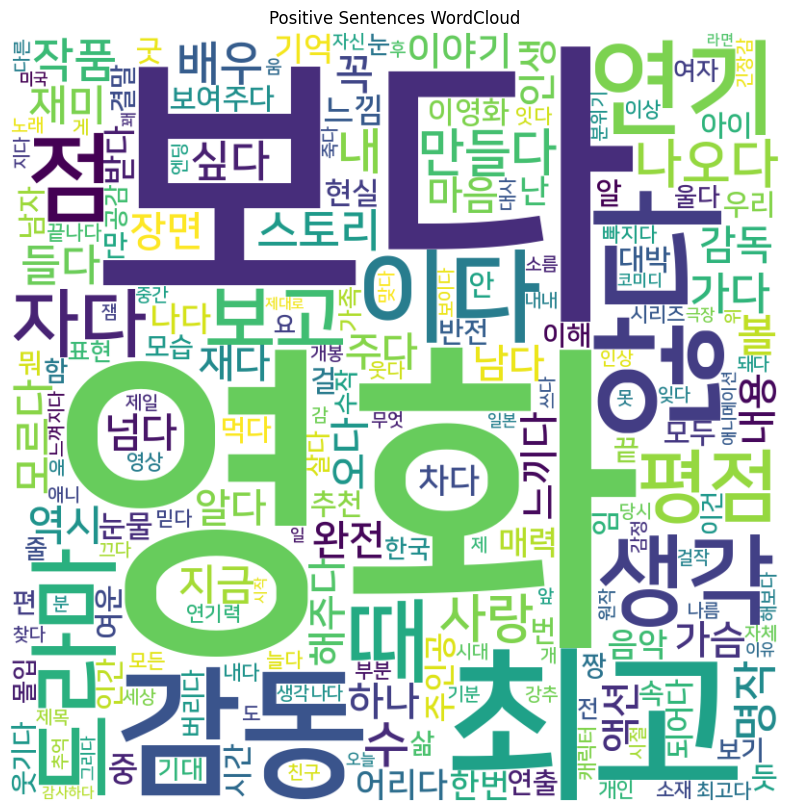

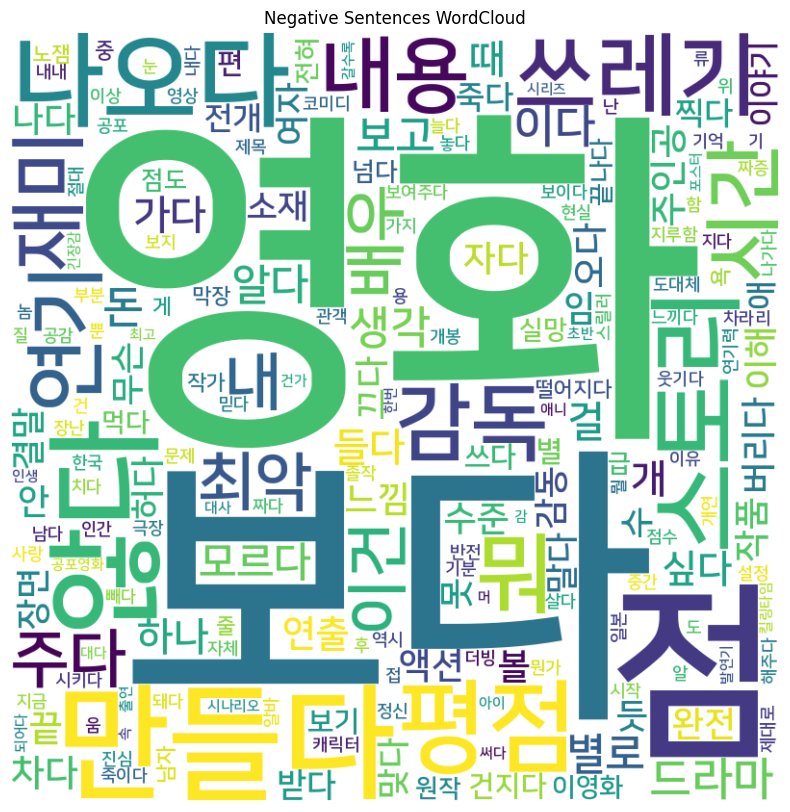

In [6]:
# KoNLPy의 Okt 객체 생성
okt = Okt()

# 불용어 리스트 (예시)
stopwords = set([
    '은', '는', '이', '가', '을', '를', '에', '의', '로', '으로', '하다', '되다', '있다',
    '곳', '것', '거', '나', '저', '너', '그', '이것', '저것', '너무', '정말', '진짜', '아주', '매우',
    '그냥', '조금', '다소', '좀', '더', '또', '또한', '하지만', '그러나', '그래서', '왜', '어떻게',
    '이렇게', '저렇게', '많이', '좋다', '나쁘다', '크다', '작다', '많다', '적다', '같다',
    '다르다', '이미', '항상', '정도', '가장', '자주', '자꾸', '여전히', '계속', '아직', '다시',
    '처음', '마지막', '이번', '저번', '다음', '요즘', '때문', '비교적', '상당히', '훨씬', '얼마나',
    '거의', '특히', '결국', '실제로', '아니', '말', '이제', '대해', '관련', '사실', '사람', '대한'
])

def get_nouns_verbs(text):
    # 명사와 동사 추출
    words = okt.pos(text, stem=True)  # 동사의 원형을 추출하기 위해 stem=True로 설정
    return [word for word, tag in words if tag in ['Noun', 'Verb'] and word not in stopwords]

# 긍정(1)과 부정(0) 문장 분할
positive_texts = df_sp[df_sp['label'] == 1]['document'].apply(get_nouns_verbs).sum()
negative_texts = df_sp[df_sp['label'] == 0]['document'].apply(get_nouns_verbs).sum()

# 각각에 대한 워드클라우드 생성
def generate_wordcloud(texts, title):
    word_counts = Counter(texts)
    wordcloud = WordCloud(font_path='/content/NanumSquareB.ttf', background_color='white', width=800, height=800).generate_from_frequencies(word_counts)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 긍정 문장 워드클라우드
generate_wordcloud(positive_texts, 'Positive Sentences WordCloud')

# 부정 문장 워드클라우드
generate_wordcloud(negative_texts, 'Negative Sentences WordCloud')


In [8]:
from collections import Counter

word_counts = Counter(positive_texts)

top_10_words = word_counts.most_common(10)

print(top_10_words)

[('영화', 8741), ('보다', 7381), ('최고', 1892), ('감동', 1307), ('않다', 1294), ('연기', 1251), ('이다', 1207), ('생각', 1122), ('점', 1098), ('드라마', 992)]


In [9]:
from collections import Counter

word_counts = Counter(negative_texts)

top_10_words_neg = word_counts.most_common(10)

print(top_10_words_neg)

[('영화', 8233), ('보다', 5508), ('점', 1565), ('만들다', 1467), ('않다', 1320), ('나오다', 1279), ('평점', 1210), ('스토리', 1145), ('쓰레기', 1091), ('뭐', 1031)]


리뷰데이터에서 명사와 동사만 추출하고, 불용어는 제거한 후 부여된 레이블에 따라 긍정과 부정 리뷰로 나누어서 워드클라우드를 생성하고 가장 빈도가 높게 나타난 단어들을 선정해보았다.

긍정과 부정에 관계없이 영화리뷰라는 측면에서 흔히 쓰이는 단어들도 함께 나타난 것을 알 수 있다.

해당 단어들을 불용어 리스트에 포함하여 다시 전처리를 해본다면 더욱 정확한 분류가 가능할 것으로 기대된다.